# [Day6-初探 Hugging Face Dataset Library](https://ithelp.ithome.com.tw/articles/10295522)

In [2]:
# 如果沒有裝 Hugging Face Datasets 的 Library 的話，可以用這個指令來裝 pip install datasets
# 使用下面的程式碼，可以先來看資料的資訊。用load_dataset_builder 不會把資料下載下來。
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("poem_sentiment")

In [3]:
# 接著使用使用下面兩欄程式碼，看資料的描述與feature。
print(ds_builder.info.description)
print(ds_builder.info.features)

Poem Sentiment is a sentiment dataset of poem verses from Project Gutenberg. This dataset can be used for tasks such as sentiment classification or style transfer for poems.

{'id': Value(dtype='int32', id=None), 'verse_text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'], id=None)}


In [4]:
# 如果覺得資料 OK 的話，就可以下載下來囉！
from datasets import load_dataset
sentiment = load_dataset("poem_sentiment")

In [5]:
sentiment

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [6]:
train_ds = sentiment["train"]
valid_ds = sentiment["validation"]
test_ds = sentiment["test"]

In [7]:
import pandas as pd
sentiment.set_format(type="pandas")
df = sentiment["train"][:]
df.head(10)

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
5,5,the red sword sealed their vows!,3
6,6,and very venus of a pipe.,2
7,7,"who the man, who, called a brother.",2
8,8,"and so on. then a worthless gaud or two,",0
9,9,to hide the orb of truth--and every throne,2


In [8]:
def label_int2str(row):
	return sentiment["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head(10)

,id,verse_text,label,label_name
0,0,with pale blue berries. in these peaceful shad...,1,positive
1,1,"it flows so long as falls the rain,",2,no_impact
2,2,"and that is why, the lonesome day,",0,negative
3,3,"when i peruse the conquered fame of heroes, an...",3,mixed
4,4,of inward strife for truth and liberty.,3,mixed
5,5,the red sword sealed their vows!,3,mixed
6,6,and very venus of a pipe.,2,no_impact
7,7,"who the man, who, called a brother.",2,no_impact
8,8,"and so on. then a worthless gaud or two,",0,negative
9,9,to hide the orb of truth--and every throne,2,no_impact


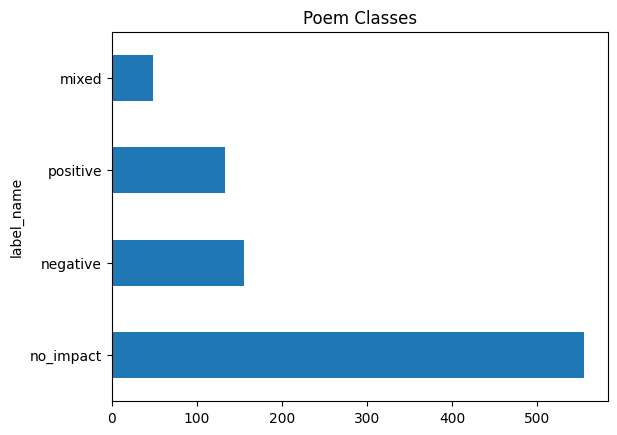

In [9]:
import matplotlib.pyplot as plt

df["label_name"].value_counts().plot.barh()
plt.title("Poem Classes")
plt.show()

In [10]:
# 不要pandas 格式的話，可以這樣子改回來
sentiment.reset_format()

In [11]:
# 也可以把 pandas 處理過的轉成新的 dataset
from datasets import Dataset
label_name_dataset = Dataset.from_pandas(df)
label_name_dataset

Dataset({
    features: ['id', 'verse_text', 'label', 'label_name'],
    num_rows: 892
})

In [12]:
# 可以這樣子 shuffle 資料
sentiment_train = sentiment["train"].shuffle(seed=5566).select(range(100))

In [13]:
# 也可以用 filter，來過濾資料，這裡用詩句的長度。
sentiment_filtered = sentiment.filter(lambda x: len(x["verse_text"]) > 30)
sentiment_filtered

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 678
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 84
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 73
    })
})

In [14]:
# 當然常見的 map 也是有的，這裡我們把詩句轉成文字長度。注意這裡的batched=True，我們之後還會再見到它。
new_dataset = sentiment.map(
    lambda x: {"verse_text": [ len(o) for o in x["verse_text"] ] }, batched=True
)
new_dataset['test'][:3]

{'id': [0, 1, 2], 'verse_text': [29, 69, 44], 'label': [2, 1, 2]}